# **Employee Turnover Analytics**

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.
As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance.
6.	Identify the best model and justify the evaluation metrics used.
7.	Suggest various retention strategies for targeted employees


## **Data Description**

satisfacion_level: Showing satisfaction of a particular employee


last_evaluation: Showing last evaluation of a particular employee

number_project: Showing number of projects handled a particular employee

average_montly_hours: Showing the monthly hours that were spent the
particular emloyee

time_spend_company: Shows the number of years spent by the particular employee in the company.

Work_accident: Showing an employee has whether been part of the company or not.

left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left

promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.

sales   : Shows the departments

salary: Shows the salary type of the employee

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# **Data Wrangling**

In [ ]:
df= pd.read_excel('1688640705_hr_comma_sep.xlsx')
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#We notice that there is a mistakenly named Sales column that represents employee departments.
data.rename(columns={'sales': 'department'}, inplace=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1.Perform data quality check by checking for missing values if any.

In [ ]:
## Find the null values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
data1=data.duplicated().sum()
print(data1)

3008


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


# **EDA**

### 2.	Understand what factors contributed most to employee turnover by EDA.

2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

<ipython-input-7-f3453bb3119a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


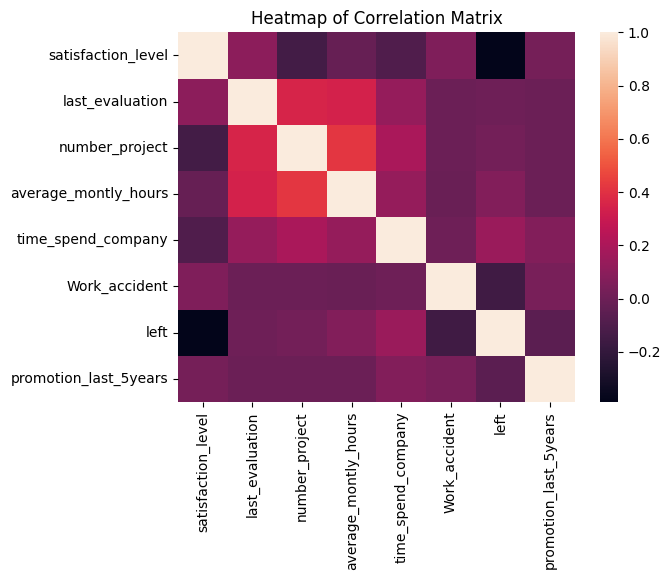

In [ ]:
corr = data.corr()
sns.heatmap(corr)
plt.title('Heatmap of Correlation Matrix')
corr

2.2.	Draw the distribution plot of

■	Employee Satisfaction (use column satisfaction_level)

■	Employee Evaluation (use column last_evaluation)

■	Employee Average Monthly Hours (use column average_montly_hours)


<ipython-input-13-1051390b2e50>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
<ipython-input-13-1051390b2e50>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.last_evaluation, kde=Fals

Text(0, 0.5, 'Employee Count')

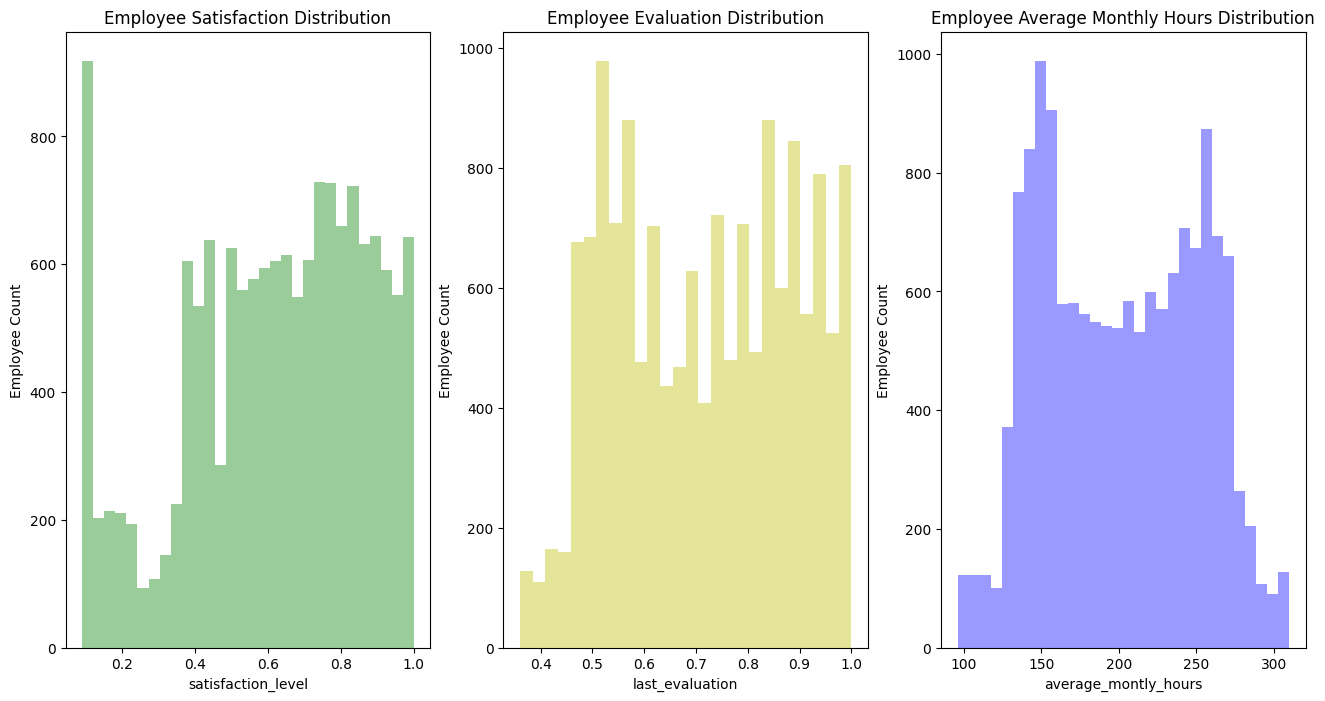

In [ ]:
# Plot the distribution of Employee Satisfaction, Evaluation, and Project Count.

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(16, 8))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction_level, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.last_evaluation, kde=False, color="y", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.average_montly_hours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')



2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

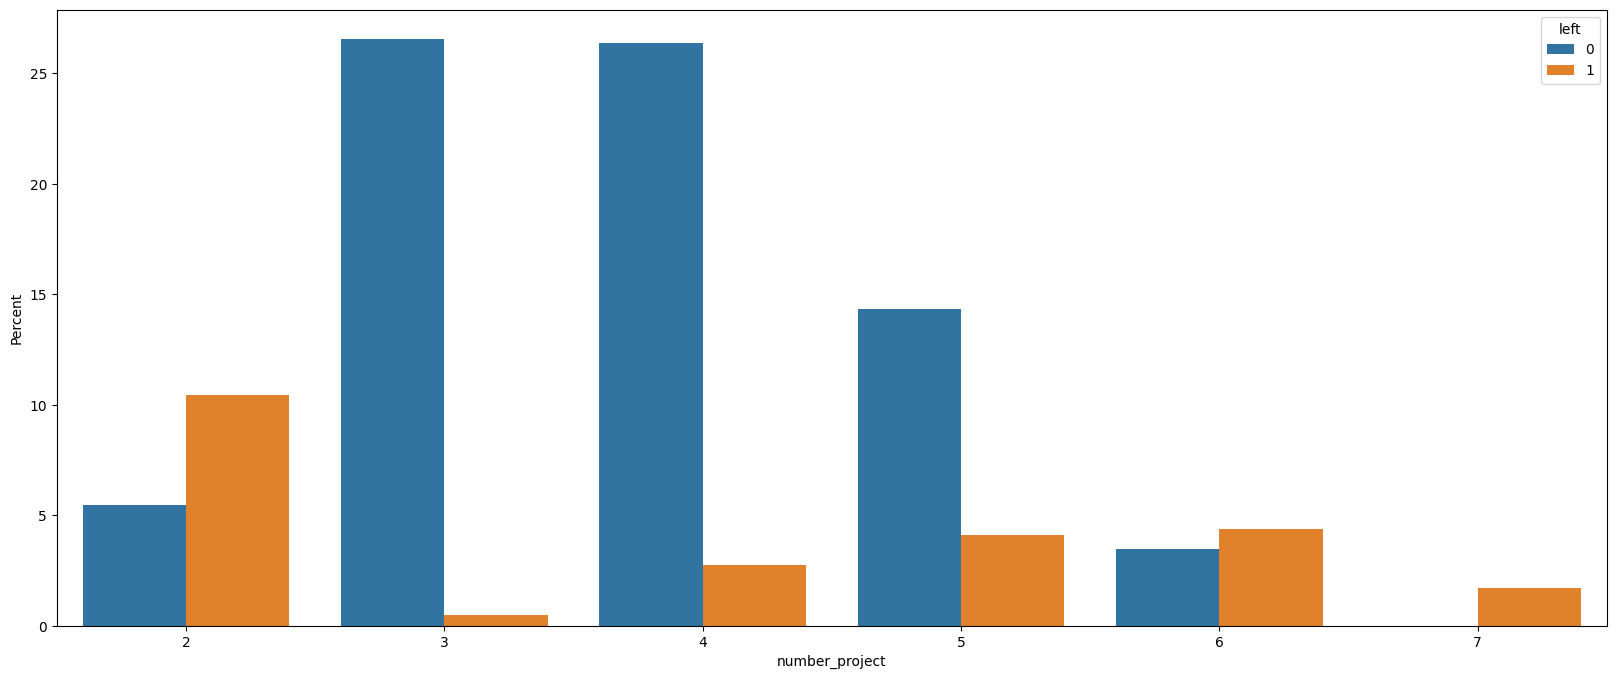

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="number_project", y="number_project", hue="left",
data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent");

1 More than half of the employees with 2, 6 and 7 projects left the company

2 All of the employees with 7 projects left the company

3 Majority of the employees who did not leave the company had 3,4, and 5 projects

4 There is an increase in employee turnover rate as project count increases



# **Cluster**

3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
3.1.	Choose columns satisfaction_level, last_evaluation and left.
3.2.	Do KMeans clustering of employees who left the company into 3 clusters.
3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


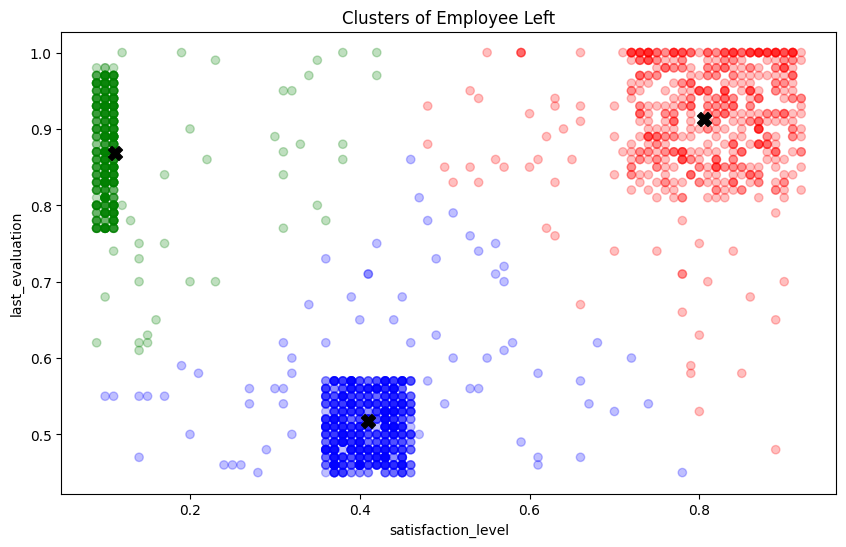

In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(data[data.left==1][["satisfaction_level","last_evaluation"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red'
for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=data[data.left==1],
 alpha=0.25,color = kmeans_colors)
plt.xlabel("satisfaction_level")
plt.ylabel("last_evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:
,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Left")
plt.show();

The cluster 1 Blue: Hard-working and Sad Employees

The cluster 2 Red: Bad and Sad Employee

The cluster 3 Green: Hard-working and Happy Employee




# **SMOTE Technique**

4.	Handle the left Class Imbalance using SMOTE technique.

Pre-Process the data by converting categorical columns to numerical columns by

■	Separating categorical variables and numeric variables.

■	Applying get_dummies() to the categorical variables.

■	Combining categorical variables and numeric variables.

4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.


### Separating categorical variables and numeric variables.

In [ ]:
Categorical_Variables = ['department','salary','left','promotion_last_5years']

In [ ]:
Numeric_Variables = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident']

### Applying get_dummies() to the categorical variables.

In [ ]:
categorical_data = pd.get_dummies(data[Categorical_Variables], drop_first=True, dummy_na=True)

In [ ]:
numerical_data = data[Numeric_Variables]

### Combining categorical variables and numeric variables.

In [ ]:
new_data = pd.concat([categorical_data ,numerical_data], axis=1)
new_data.head()

,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,...,department_nan,salary_low,salary_medium,salary_nan,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0.37,0.52,2,159,3,0


### 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve



In [ ]:
# Create the X and y set
X = new_data.drop('left',axis=1)
y = new_data['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(9592, 20)
(2399, 20)


### 4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=123, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (9592, 20) (9592,)
SMOTE sample shape: (15998, 20) (15998,)


# **Cross Validation Model**

# .	Perform 5-Fold cross-validation model training and evaluate performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
Log_Reg = LogisticRegression()
Log_Reg = Log_Reg.fit(x_train_sm, y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Apply 5-Fold Cross Validation on Logistic Regression

In [ ]:
Log_Reg_result = cross_val_score(Log_Reg, x_train_sm, y_train_sm, cv=5,
scoring='f1')
Log_Reg_result.mean()

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2001
           1       0.38      0.65      0.48       398

    accuracy                           0.76      2399
   macro avg       0.65      0.72      0.66      2399
weighted avg       0.83      0.76      0.79      2399



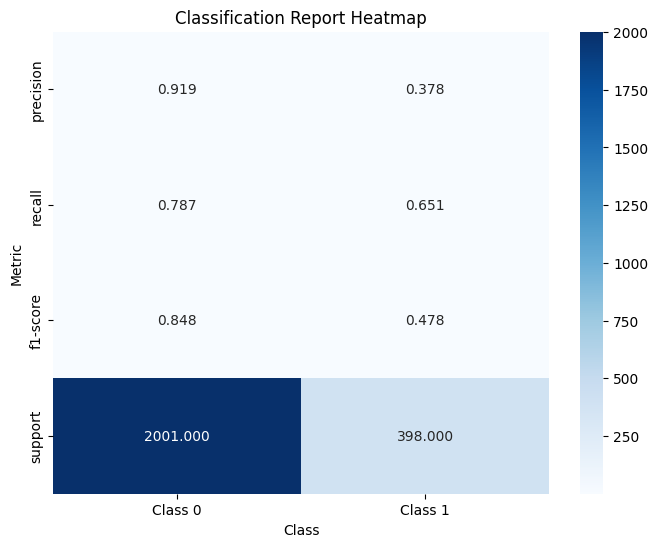

In [ ]:
print(classification_report(y_test, Log_Reg .predict(X_test)))

from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and X_test are your test data and labels, and Log_Reg is your trained Logistic Regression model

# Make predictions on the test data
y_pred = Log_Reg.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Extract the relevant metrics
class_names = ['Class 0', 'Class 1']
metrics = ['precision', 'recall', 'f1-score', 'support']
data = [[report[class_name][metric] for class_name in class_names] for metric in metrics]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.3f', cmap='Blues', xticklabels=class_names, yticklabels=metrics)
plt.xlabel('Class')
plt.ylabel('Metric')
plt.title('Classification Report Heatmap')
plt.show()

5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_f = RandomForestClassifier()
random_f = random_f.fit(x_train_sm, y_train_sm)
random_f

Apply 5-Fold Cross Validation on Random Forest

In [ ]:
rf_result = cross_val_score(random_f, x_train_sm, y_train_sm, cv=5,
scoring='f1')
rf_result.mean()

0.9731920656797026

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.90      0.91       398

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



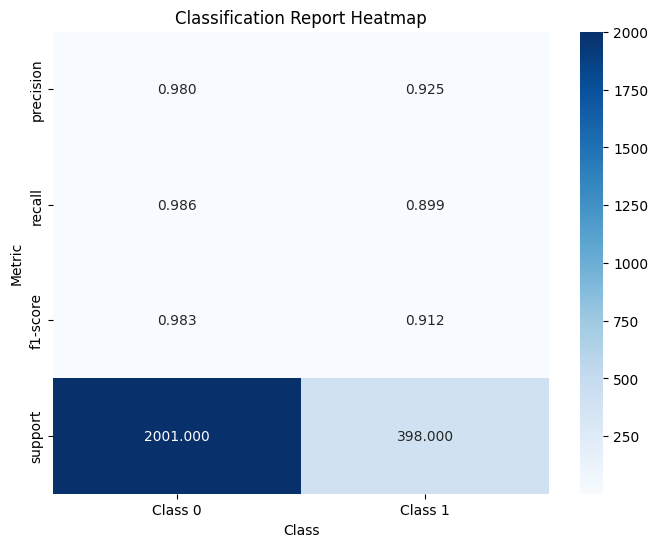

In [ ]:
print(classification_report(y_test, random_f.predict(X_test)))

# Make predictions on the test data
y_pred = random_f.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Extract the relevant metrics
class_names = ['Class 0', 'Class 1']
metrics = ['precision', 'recall', 'f1-score', 'support']
data = [[report[class_name][metric] for class_name in class_names] for metric in metrics]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.3f', cmap='Blues', xticklabels=class_names, yticklabels=metrics)
plt.xlabel('Class')
plt.ylabel('Metric')
plt.title('Classification Report Heatmap')
plt.show()

5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC = GBC.fit(x_train_sm,y_train_sm)
GBC

GradientBoostingClassifier()

Apply 5-Fold Cross Validation on Gradient Boosting Classifier

In [ ]:
GBC_result = cross_val_score(GBC, x_train_sm, y_train_sm, cv=5,
scoring='f1')
GBC_result.mean()

0.9554641616315767

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.85      0.92      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



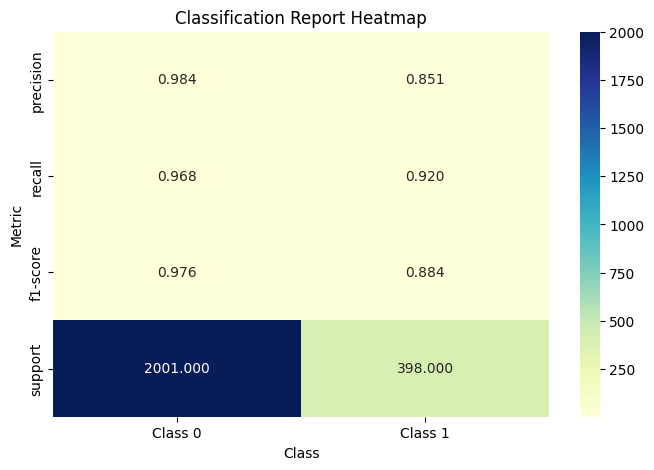

In [ ]:
print(classification_report(y_test, GBC.predict(X_test)))
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and X_test are your test data and labels, and GBC is your trained Gradient Boosting Classifier model

# Make predictions on the test data
y_pred = GBC.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

# Extract metrics from the classification report
class_names = ['Class 0', 'Class 1']
metrics = ['precision', 'recall', 'f1-score', 'support']
data = [[report[class_name][metric] for class_name in class_names] for metric in metrics]

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data, annot=True, fmt='.3f', cmap='YlGnBu', xticklabels=class_names, yticklabels=metrics, cbar=True)
plt.xlabel('Class')
plt.ylabel('Metric')
plt.title('Classification Report Heatmap')
plt.show()


# 6.	Identify the best model and justify the evaluation metrics used.

6.1.	Find the ROC/AUC for each model and plot the ROC curve.

In [ ]:
#Logistic Regression Classifier AUC (0.77)
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, Log_Reg.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
lr2 = Log_Reg.fit(x_train_sm, y_train_sm)



 ---Logistic Regression Model---
Logistic Regression AUC = 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Random Forest Classifier AUC (0.97)
from sklearn.metrics import roc_auc_score
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, random_f.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)



 ---Random Forest Model---
Random Forest AUC = 0.94


In [ ]:
#Gradient Boosting Classifier AUC (0.96)
from sklearn.metrics import roc_auc_score
print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, GBC.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.94


# Model Evaluation (F1 Score & ROC/AUC)

# **ROC Graph**

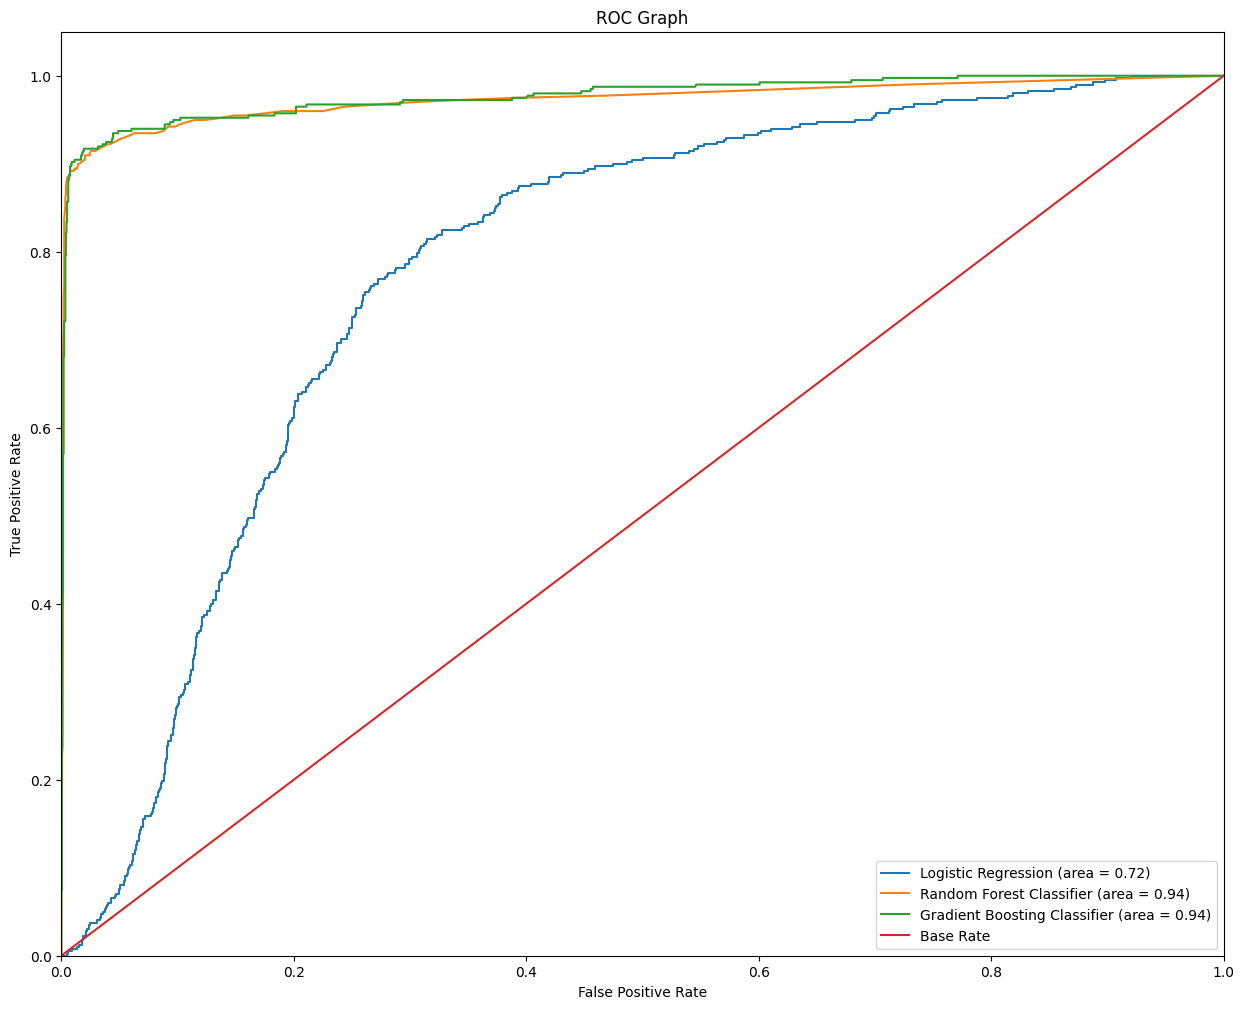

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, Log_Reg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,
random_f.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test,
GBC.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();


# 6.2.	Find the confusion matrix for each of the models.

In [ ]:
# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, Log_Reg.predict(X_test))

array([[1574,  427],
       [ 139,  259]])

In [ ]:
# Confusion Matrix for GBC
confusion_matrix(y_test, GBC.predict(X_test))

array([[1937,   64],
       [  32,  366]])

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, random_f.predict(X_test))

array([[1972,   29],
       [  40,  358]])

### 6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?

It depends on how much cost/weight you want on your two types of errors: (1) False Positives or (2) False Negatives


We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee.

• Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

• Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire.

• Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly


_  The Random Forest Classifier AUC is the best model

# **7.	Suggest various retention strategies for targeted employees.**

7.1.	Using the best model, predict the probability of employee turnover in the test data.

### **Retention Plan**

In [ ]:
employee_probabilities = random_f.predict_proba(X_test)[:, 1]

In [ ]:
safe_zone_threshold = 0.20
low_risk_zone_threshold = 0.60
medium_risk_zone_threshold = 0.90

# Categorize employees into zones
employee_zones = []

for prob in employee_probabilities:
    if prob < safe_zone_threshold:
        employee_zones.append("Safe Zone (Green)")
    elif prob < low_risk_zone_threshold:
        employee_zones.append("Low Risk Zone (Yellow)")
    elif prob < medium_risk_zone_threshold:
        employee_zones.append("Medium Risk Zone (Orange)")
    else:
        employee_zones.append("High Risk Zone (Red)")

# Now 'employee_zones' contains the zone category for each employee based on their probability scores.

# Suggest retention strategies for each zone
for i, zone in enumerate(employee_zones):
    print(f"Employee {i + 1} is in the {zone}.")

Employee 1 is in the Safe Zone (Green).
Employee 2 is in the Low Risk Zone (Yellow).
Employee 3 is in the Safe Zone (Green).
Employee 4 is in the High Risk Zone (Red).
Employee 5 is in the Safe Zone (Green).
Employee 6 is in the High Risk Zone (Red).
Employee 7 is in the Safe Zone (Green).
Employee 8 is in the Safe Zone (Green).
Employee 9 is in the Safe Zone (Green).
Employee 10 is in the Safe Zone (Green).
Employee 11 is in the Safe Zone (Green).
Employee 12 is in the Safe Zone (Green).
Employee 13 is in the Safe Zone (Green).
Employee 14 is in the Safe Zone (Green).
Employee 15 is in the Safe Zone (Green).
Employee 16 is in the Low Risk Zone (Yellow).
Employee 17 is in the Low Risk Zone (Yellow).
Employee 18 is in the Safe Zone (Green).
Employee 19 is in the Safe Zone (Green).
Employee 20 is in the Safe Zone (Green).
Employee 21 is in the Medium Risk Zone (Orange).
Employee 22 is in the Safe Zone (Green).
Employee 23 is in the Safe Zone (Green).
Employee 24 is in the Low Risk Zone (

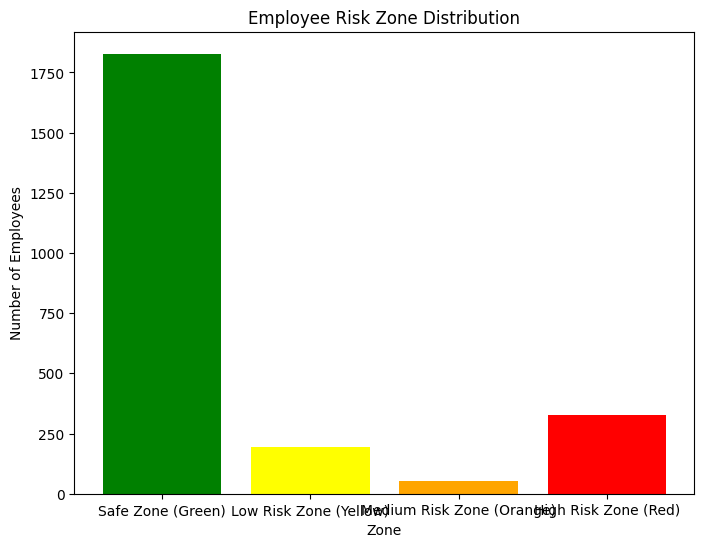

In [ ]:
import matplotlib.pyplot as plt

# Count the number of employees in each risk zone
zone_counts = {
    "Safe Zone (Green)": 0,
    "Low Risk Zone (Yellow)": 0,
    "Medium Risk Zone (Orange)": 0,
    "High Risk Zone (Red)": 0,
}

for zone in employee_zones:
    zone_counts[zone] += 1

# Extract the zone labels and counts
zone_labels = list(zone_counts.keys())
zone_values = list(zone_counts.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(zone_labels, zone_values, color=['green', 'yellow', 'orange', 'red'])
plt.xlabel('Zone')
plt.ylabel('Number of Employees')
plt.title('Employee Risk Zone Distribution')
plt.show()

Safe Zone (Green) • No Action required

Low Risk Zone (Yellow) • Action to be taken on long term basis

• Apply group interventions

• HR to track demographic data for these individuals to see if the risk profiles are changing or if the equation needs to be altered

Medium Risk Zone (Orange) • Action to be taken on medium term basis

• HR to keep a close watch on the behavioral status to change from "Medium" to "High" risk. HR to analyze demographic data to identify high risk supervisors and point them to the BU heads

• Apply group interventions

High Risk Zone (Red) • Action to be taken on immediate basis

• HR to send list to the concerned managers for immediate acion

• HR to validate the risks for consistency with the identified clusters

• Managers to have one - to one conversation with the identified employee.